# Chunking

Demo tutorial for how to use nlp_toolkit to train sequence labeling model and predict new samples. The task we choose is noun phrases labeling.

The dataset includes working experience texts from different cv, and we want to label noun phrases in given text.

Available models:

1. WordRNN
2. CharRNN
3. IDCNN

In [2]:
import sys
sys.path.append('../')
from nlp_toolkit import Dataset, Labeler

D:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Data Processing

### Load config dict

In [9]:
import yaml
config = yaml.load(open('../config_sequence_labeling.yaml', encoding='utf8'))
# config['data']['inner_char'] = True
config['data']['basic_token'] = 'char'
config['data']['use_seg'] = True
config['data']['use_radical'] = True

### Load data

In [10]:
dataset = Dataset(fname='../data/cv_word.txt', task_type='sequence_labeling', mode='train', config=config)

2018-11-24 21:28:35,242 - data.py[line:73] - WARNING: please set inner_char as False in config file
2018-11-24 21:28:37,170 - data.py[line:136] - INFO: data loaded


In [4]:
for x, y in zip(dataset.texts[0:10], dataset.labels[0:10]):
    print(list(zip(x, y)))

[('主要', 'O'), ('帮助', 'O'), ('工地', 'B-Chunk'), ('师傅', 'E-Chunk'), ('一起', 'O'), ('超平', 'O'), (',', 'O'), ('防线', 'O'), ('工作', 'O')]
[('协助', 'O'), ('线', 'O'), ('上', 'O'), ('、', 'O'), ('线', 'B-Chunk'), ('下', 'I-Chunk'), ('活动', 'E-Chunk'), ('的', 'O'), ('执行', 'O')]
[('执行', 'O'), ('各项', 'O'), ('培训', 'O'), ('相关', 'O'), ('的', 'O'), ('各项', 'O'), ('工作', 'B-Chunk'), ('流程', 'E-Chunk')]
[('云南', 'O'), (':', 'O'), ('曲靖', 'O'), ('、', 'O'), ('昭通', 'O'), ('下属', 'O'), ('的', 'O'), ('5', 'O'), ('个', 'O'), ('县级', 'O'), ('供电', 'B-Chunk'), ('公司', 'E-Chunk'), ('10', 'O'), ('个', 'O'), ('供电所', 'O')]
[('担任', 'O'), ('培训', 'O'), ('学校', 'B-Chunk'), ('英语', 'I-Chunk'), ('讲师', 'E-Chunk'), ('一', 'O'), ('职', 'O'), ('和', 'O'), ('学生', 'B-Chunk'), ('管理', 'E-Chunk')]
[('搜寻', 'O'), ('招标', 'B-Chunk'), ('公告', 'E-Chunk'), (',', 'O'), ('告知', 'O'), ('领导', 'O'), ('及', 'O'), ('业务', 'B-Chunk'), ('人员', 'E-Chunk'), (',', 'O'), ('确认', 'O'), ('是否', 'O'), ('报名', 'O')]
[('2001', 'O'), ('/', 'O'), ('10', 'O'), ('--', 'O'), ('2002', 'O'), ('/'

### Transform data to index

In [11]:
# if we want to use pre_trained embeddings, we need a gensim-format embedding file
x, y, config = dataset.transform()
print(x['token'].shape, y.shape)

2018-11-24 21:28:50,008 - data.py[line:214] - INFO: texts and labels have been transformed to number index
2018-11-24 21:28:50,008 - data.py[line:222] - INFO: Use Embeddings from Straching


(57415, 120) (57415, 120, 4)


if your want to see the vocab and label index mapping dict

In [7]:
# dataset.transformer._word_vocab._token2id

In [8]:
# dataset.transformer._label_vocab._token2id

In [6]:
transformer = dataset.transformer

## Chunking Labeling

### Define Sequence Labeler

avialiable models: model_name_list = ['word_rnn', 'char_rnn', 'idcnn']

In [7]:
model_name='char_rnn'
seq_labeler = Labeler(model_name=model_name, transformer=transformer, seq_type='bucket', config=config)

### Train model

In [8]:
trained_model = seq_labeler.train(x, y)

2018-11-24 19:58:26,677 - trainer.py[line:129] - INFO: char_rnn model structure...
2018-11-24 19:58:26,796 - trainer.py[line:139] - INFO: train/valid set: 45932/11483
2018-11-24 19:58:26,796 - trainer.py[line:89] - INFO: use bucket sequence to speed up model training
2018-11-24 19:58:26,797 - sequence.py[line:346] - INFO: Training with 100 non-empty buckets


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
token (InputLayer)              (None, None)         0                                            
__________________________________________________________________________________________________
char_embeddings (Embedding)     (None, None, 32)     334400      token[0][0]                      
__________________________________________________________________________________________________
seg (InputLayer)                (None, None)         0                                            
__________________________________________________________________________________________________
radical (InputLayer)            (None, None)         0                                            
__________________________________________________________________________________________________
spatial_dr

2018-11-24 19:58:27,181 - sequence.py[line:346] - INFO: Training with 100 non-empty buckets


mointor training process using f1 score and label acc
Successfully made a directory: models\char_rnn_201811241958
using Early Stopping
using Reduce LR On Plateau
tracking loss history and metrics


2018-11-24 19:58:27,741 - trainer.py[line:171] - INFO: saving model parameters and transformer to models\char_rnn_201811241958


model hyperparameters:
 {'nb_classes': 4, 'nb_tokens': 10450, 'maxlen': None, 'embedding_dim': 32, 'use_crf': True, 'use_seg': True, 'use_radical': True, 'use_nchar': False, 'rnn_type': 'lstm', 'nb_rnn_layers': 2, 'drop_rate': 0.5, 're_drop_rate': 0.15, 'char_rnn_size': 64, 'embed_dropout_rate': 0.15, 'nb_seg_tokens': 6, 'nb_radical_tokens': 233}
Epoch 1/25
769/769 [==============================] - 245s 318ms/step - loss: 0.5336 - acc: 0.8156 - val_loss: 0.2940 - val_acc: 0.8853
 - acc: 86.08
 - f1: 83.15
             precision    recall  f1-score   support

      Chunk       0.87      0.80      0.83      1579

avg / total       0.87      0.80      0.83      1579


Epoch 00001: f1_seq improved from -inf to 0.83152, saving model to models\char_rnn_201811241958\model_weights_01_0.8853_0.8315.h5
Epoch 2/25
769/769 [==============================] - 237s 309ms/step - loss: 0.2502 - acc: 0.8898 - val_loss: 0.2037 - val_acc: 0.8983
 - acc: 85.14
 - f1: 83.89
             precision    recall

### 10-fold training

In [9]:
config['train']['train_mode'] = 'fold'
seq_labeler_new = Labeler(model_name=model_name, transformer=transformer, seq_type='bucket', config=config)
seq_labeler_new.train(x,y)

2018-11-24 20:40:57,855 - trainer.py[line:186] - INFO: 10-fold starts!



------------------------ fold 0------------------------


2018-11-24 20:40:59,408 - trainer.py[line:199] - INFO: char_rnn model structure...
2018-11-24 20:40:59,517 - trainer.py[line:89] - INFO: use bucket sequence to speed up model training
2018-11-24 20:40:59,520 - sequence.py[line:346] - INFO: Training with 100 non-empty buckets


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
token (InputLayer)              (None, None)         0                                            
__________________________________________________________________________________________________
char_embeddings (Embedding)     (None, None, 32)     334400      token[0][0]                      
__________________________________________________________________________________________________
seg (InputLayer)                (None, None)         0                                            
__________________________________________________________________________________________________
radical (InputLayer)            (None, None)         0                                            
__________________________________________________________________________________________________
spatial_dr

2018-11-24 20:40:59,945 - sequence.py[line:346] - INFO: Training with 100 non-empty buckets


mointor training process using f1 score and label acc
using Early Stopping
using Reduce LR On Plateau
tracking loss history and metrics
Epoch 1/25
857/857 [==============================] - 257s 300ms/step - loss: 0.9572 - acc: 0.6617 - val_loss: 0.8648 - val_acc: 0.6707
 - acc: 0.14
 - f1: 0.00
             precision    recall  f1-score   support

      Chunk       0.00      0.00      0.00       641

avg / total       0.00      0.00      0.00       641

Epoch 2/25
857/857 [==============================] - 252s 294ms/step - loss: 0.8526 - acc: 0.6676 - val_loss: 0.8168 - val_acc: 0.6718
 - acc: 0.74
 - f1: 0.00
             precision    recall  f1-score   support

      Chunk       0.00      0.00      0.00       641

avg / total       0.00      0.00      0.00       641

Epoch 3/25
857/857 [==============================] - 252s 294ms/step - loss: 0.8044 - acc: 0.6694 - val_loss: 0.7558 - val_acc: 0.6806
 - acc: 4.13
 - f1: 0.81
             precision    recall  f1-score   support

   

KeyboardInterrupt: 

## Predict New Samples

### Load data and transformer

In [1]:
import sys
sys.path.append('../')
from nlp_toolkit import Dataset, Labeler

dataset = Dataset(fname='../data/cv_word_predict.txt',
                  task_type='sequence_labeling', mode='predict',
                  tran_fname='models/char_rnn_201811241958/transformer.h5')
x_seq = dataset.transform()

D:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
2018-11-25 10:56:19,683 - data.py[line:98] - INFO: transformer loaded
2018-11-25 10:56:19,798 - data.py[line:136] - INFO: data loaded


### Load model

In [2]:
seq_labeler = Labeler('char_rnn', dataset.transformer)
seq_labeler.load(weight_fname='models/char_rnn_201811241958/model_weights_03_0.8972_0.8589.h5',
                 para_fname='models/char_rnn_201811241958/model_parameters.json')

model loaded


### predict samples

In [3]:
y_pred = seq_labeler.predict(x_seq)

2018-11-25 10:59:09,768 - labeler.py[line:164] - INFO: predict 57415 samples used 161.7s


In [4]:
# see the actual predict results
results = seq_labeler.show_results(x_seq, y_pred)
results[0]

[('主', 'O'),
 ('要', 'O'),
 ('帮', 'O'),
 ('助', 'O'),
 ('工', 'B-Chunk'),
 ('地', 'I-Chunk'),
 ('师', 'I-Chunk'),
 ('傅', 'E-Chunk'),
 ('一', 'O'),
 ('起', 'O'),
 ('超', 'O'),
 ('平', 'O'),
 (',', 'O'),
 ('防', 'O'),
 ('线', 'O'),
 ('工', 'O'),
 ('作', 'O')]

### entity visualization

In [3]:
from nlp_toolkit.visualization import entity_visualization
labels = [['B-Chunk', 'E-Chunk', 'O', 'O', 'O', 'B-Chunk', 'E-Chunk', 'O'], ['B-Chunk', 'I-Chunk', 'E-Chunk', 'O', 'O', 'O', 'O', 'O', 'O', 'B-Chunk', 'E-Chunk']]
sentence = ['Deep learning is part of machine learning .', 'Natural language processing is one of the most exciting AI techniques.']

In [4]:
entity_visualization(sentence, labels)

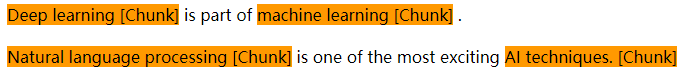

In [6]:
from IPython.display import Image
Image('../images/entity_visualization_sample.jpg')